# Appendix 3 - Server-based streamer

In [1]:
from openbci_stream.consumer import OpenBCIConsumer

aux = []
with OpenBCIConsumer(host='192.168.1.1') as stream:
    for i, message in enumerate(stream):
        if message.topic == 'eeg':
            print(f"{i} received {message.value['samples']} samples")
            print(message.value['data'][0].shape)
            aux.append(message.value['data'][1])
            if i == 20:
                break

0 received 250 samples
(16, 250)
1 received 250 samples
(16, 250)
2 received 250 samples
(16, 250)
3 received 250 samples
(16, 250)
4 received 250 samples
(16, 250)
5 received 251 samples
(16, 251)
6 received 250 samples
(16, 250)
7 received 250 samples
(16, 250)
8 received 250 samples
(16, 250)
9 received 250 samples
(16, 250)
10 received 251 samples
(16, 251)
11 received 250 samples
(16, 250)
12 received 250 samples
(16, 250)
13 received 250 samples
(16, 250)
14 received 250 samples
(16, 250)
15 received 251 samples
(16, 251)
16 received 250 samples
(16, 250)
17 received 250 samples
(16, 250)
18 received 250 samples
(16, 250)
19 received 250 samples
(16, 250)
20 received 250 samples
(16, 250)


In [9]:
print(message.topic)
print(message.timestamp/1000)

eeg
1581628509.871


In [5]:
message.value.keys()

dict_keys(['context', 'data', 'binary_created', 'created', 'samples'])

In [7]:
message.value['context']

{'daisy': True,
 'boardmode': 'analog',
 'montage': {0: 'Fp1',
  1: 'Fp2',
  2: 'F7',
  3: 'Fz',
  4: 'F8',
  5: 'C3',
  6: 'Cz',
  7: 'C4',
  8: 'T5',
  9: 'P3',
  10: 'Pz',
  11: 'P4',
  12: 'T6',
  13: 'O1',
  14: 'Oz',
  15: 'O2'},
 'connection': 'wifi',
 'created': 1581628509.761748}

In [8]:
print(message.value['binary_created'])
print(message.value['created'])
print(message.value['samples'])

1581628509.761748
1581628509.870384
250


In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [9]:
aux = np.concatenate(aux, axis=1)

In [16]:
accel = aux.copy()

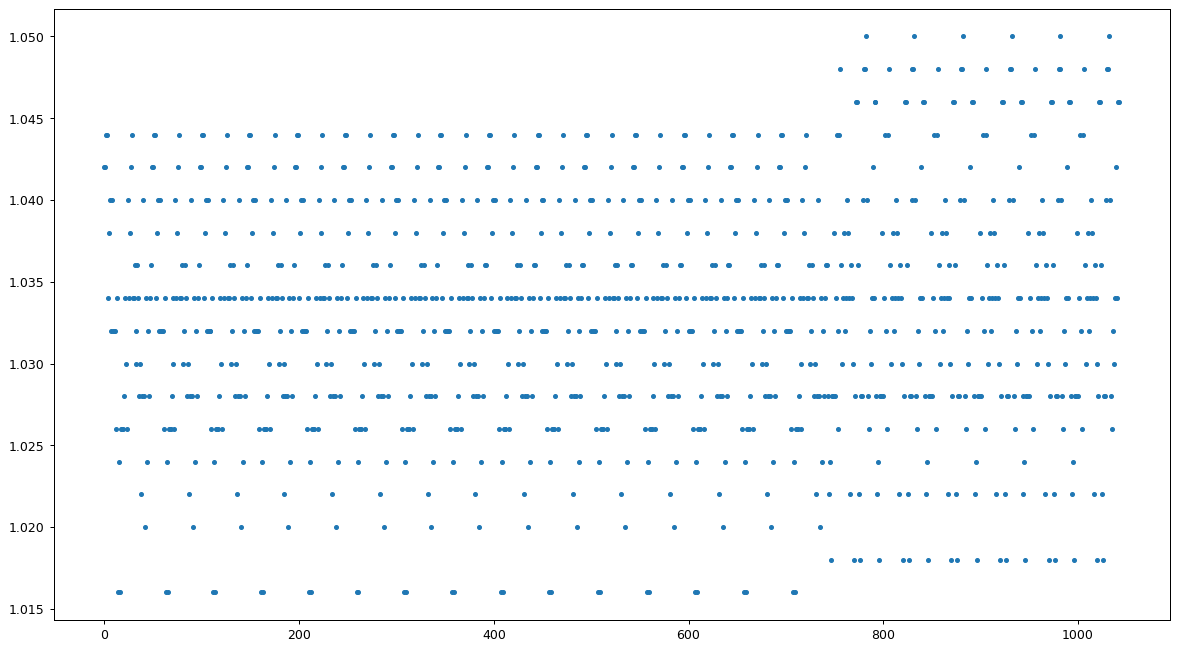

In [35]:
plt.figure(figsize=(16, 9), dpi=90)

# np.sum(accel, axis=1)

accel = accel[:,[np.sum(accel, axis=0)>0][0]]

x, y, z = accel

plt.plot(x+y+z, '.')
# plt.plot(y)
# plt.plot(z)

In [1]:
import numpy as np

In [5]:
x = np.random.normal(size=(16, 1000))
x.shape

(16, 1000)

In [22]:
num = 3
axis = 1
ndim = x.shape[axis]//num
x[:,:ndim*num].reshape(x.shape[0], num, ndim).mean(axis=-1)

array([[ 0.00302002, -0.04024626,  0.06236182],
       [ 0.03601006, -0.02966403,  0.01805888],
       [ 0.03659651,  0.02649429,  0.09142369],
       [-0.06649418,  0.03352203,  0.01228687],
       [-0.02791091,  0.00608974,  0.07782439],
       [ 0.06468902, -0.03329999,  0.00379469],
       [-0.04446819,  0.03819817,  0.03482209],
       [-0.12475357, -0.0281512 ,  0.03438613],
       [ 0.02394953,  0.0321186 ,  0.08247535],
       [ 0.05636181,  0.03244913,  0.01601828],
       [-0.00704738, -0.04176212, -0.0808218 ],
       [ 0.0259351 ,  0.0019675 ,  0.03752613],
       [ 0.05132907,  0.03966032,  0.0620099 ],
       [ 0.03805464, -0.02076189,  0.01683512],
       [ 0.0504945 , -0.03659737,  0.01889498],
       [ 0.01813019, -0.00260687,  0.12962264]])

In [21]:
import numpy as np
from matplotlib import pyplot as plt

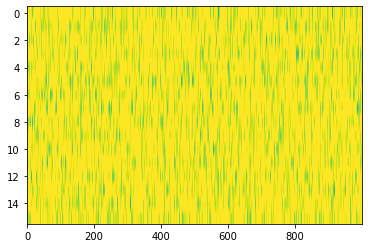

In [51]:
x = np.random.normal(5, 2, size=(16, 1000))
y = np.zeros((16, 100))
plt.imshow(x, aspect='auto', vmin=-5, vmax=5)

In [17]:
np.roll(x, -1, axis=1)

array([[-0.85850652, -1.00346503, -0.2781734 , ...,  0.08550755,
         0.76256926,  0.54233003],
       [ 0.04131298, -0.86200172, -2.22757086, ...,  1.17239348,
         0.61221405,  0.47427229],
       [ 0.47820787,  0.25470166,  0.98239032, ..., -0.12755428,
         0.7422402 , -1.53362737],
       ...,
       [-1.38286712, -1.81135322, -1.72690883, ...,  0.077977  ,
         0.20831465, -0.22081234],
       [-1.83580233, -1.78838054, -0.822804  , ...,  0.95287669,
         0.86880813, -1.07156317],
       [-0.19430012, -0.80640333,  0.50733438, ..., -0.87506363,
         1.78316933, -0.25405327]])

In [37]:
x - x.mean(axis=1)

In [38]:
from numpy.linalg import norm

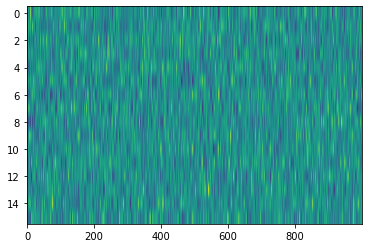

In [53]:
xx = np.apply_along_axis(lambda x:x-x.mean(), 0, x)
plt.imshow(xx, aspect='auto', vmin=-5, vmax=5)